<a href="https://colab.research.google.com/github/AayanHidol/PyTorch/blob/main/PyTorch_01_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing dependencies

In [ ]:
import torch
from torch import nn           # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

from pathlib import Path # will be used to define where to save the model we will create

## 1. Data (preparing and loading)

### Creating fake data

In [ ]:
# Create known parameters
w = 0.7
b = 0.3

# Create data
X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1)
y = w * X + b

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Create train/ test split

s = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing set
X_train, y_train = X[:s], y[:s]
X_test, y_test = X[s:], y[s:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_preds(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               predictions=None):
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, s=4, c="b", label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, s=4, c="g", label="Testing data")

  if predictions is not None:
    # Plot predictions in red (predictions will be made by our model on `test_data`)
    plt.scatter(test_data, predictions, s=4, c="r", label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

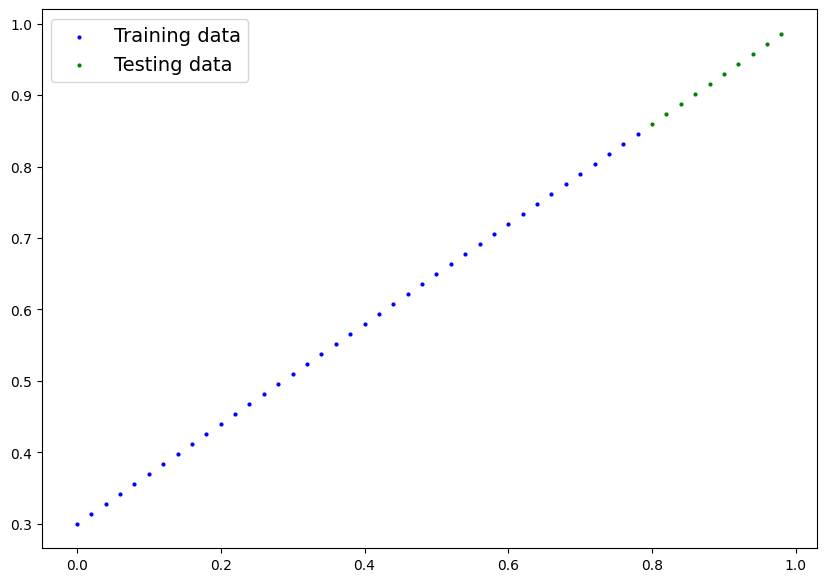

In [ ]:
plot_preds()

## 2. Build a model

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()

    # start with random weights (these will get adjusted as the model learns)
    self.weights = nn.Parameter(torch.randn(1,  # the size of the output desired by us
                                            dtype=torch.float), # the dtype we want to get our weights in
                                requires_grad=True) # can we update this value with gradient descent?

    # start with random bias (this will get adjusted as the model learns)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                             requires_grad=True)


  # Forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

Let's break down the code for `LinearRegressionModel` in detail, step by step, to understand the underlying purpose and functionality of each line:

#### 1. `class LinearRegressionModel(nn.Module):`

* **Purpose**: Here, we're defining a class called `LinearRegressionModel` that inherits from `nn.Module`.
* **Explanation**:

  * `nn.Module` is the base class for all neural network modules in PyTorch. It provides common functionality for defining models, including support for automatic differentiation and easy access to parameters (weights and biases).
  * Inheritance from `nn.Module` makes `LinearRegressionModel` a PyTorch model, allowing us to use all the built-in features like optimization, parameter updates, and more.

#### 2. `def __init__(self):`

* **Purpose**: This is the constructor method for the class. It’s automatically called when an instance of the class is created.
* **Explanation**:

  * The constructor initializes the weights and biases of the linear regression model. These are the parameters the model will learn during training.
  * This method also calls `super().__init__()` to initialize the parent class (`nn.Module`), which is essential to properly integrate with PyTorch's infrastructure.

#### 3. `super().__init__()`

* **Purpose**: This line ensures that the parent class `nn.Module` is initialized.
* **Explanation**:

  * `super()` refers to the parent class (`nn.Module`), and calling `super().__init__()` ensures that the underlying functionality of `nn.Module` is properly set up for the `LinearRegressionModel` class.
  * This includes preparing the model for gradient tracking, setting up parameter containers, and other PyTorch model functionalities.

#### 4. `self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)`

* **Purpose**: This line initializes the weights for the model.
* **Explanation**:

  * `torch.randn(1, dtype=torch.float)` creates a tensor with one random number drawn from a normal distribution (mean 0, variance 1). It initializes the weight parameter randomly to start training.
  * `nn.Parameter()` converts this tensor into a learnable parameter. In PyTorch, `nn.Parameter` is essentially a wrapper around a tensor that tells the model that this tensor should be optimized during training.
  * `requires_grad=True` means that we want PyTorch to track the gradient of this tensor during backpropagation (i.e., updating this value with gradient descent).

#### 5. `self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)`

* **Purpose**: This line initializes the bias term for the model.
* **Explanation**:

  * Just like `self.weights`, the bias is also initialized randomly with `torch.randn(1)`.
  * `nn.Parameter()` wraps the bias tensor so that it can be learned during training.
  * `requires_grad=True` ensures that the bias is updated through backpropagation as well.

#### 6. `def forward(self, x: torch.Tensor) -> torch.Tensor:`

* **Purpose**: This method defines the forward pass of the model (i.e., how the input `x` is transformed into an output).
* **Explanation**:

  * In PyTorch, the `forward` method specifies what happens when data is passed through the model. Here, it takes `x` (the input tensor) and returns the output tensor.
  * The `x: torch.Tensor` part of the function signature indicates that `x` is a PyTorch tensor (likely containing input features like `x1, x2, ..., xn` in the case of multiple variables).
  * The return type `-> torch.Tensor` indicates that the function will output a tensor as well.

#### 7. `return self.weights * x + self.bias`

* **Purpose**: This is the core of the linear regression computation, implementing the equation $y = m \cdot x + b$.
* **Explanation**:

  * `self.weights * x`: This computes the weighted sum of the input features. Here `self.weights` represents the "slope" (or weight) of the linear equation, and multiplying it by `x` scales the input data by this weight.
  * `+ self.bias`: The bias term is added to the result. This represents the "y-intercept" of the linear regression model (shifting the output along the y-axis).
  * The final result is the predicted value (or output `y`) based on the input `x`, the learned weight (`self.weights`), and the learned bias (`self.bias`).

#### Full Explanation of the Model

In summary, the `LinearRegressionModel` class represents a simple linear regression model where the input `x` is transformed into a predicted output $y$ by applying a linear equation of the form:

$$
y = m \cdot x + b
$$

* **Weights (`self.weights`)**: These are the model's learnable parameters that determine how strongly each input `x` influences the output. They're initialized randomly and updated during training.
* **Bias (`self.bias`)**: This term shifts the linear equation vertically and is also a learnable parameter.
* **Forward Pass**: The `forward()` method defines how the input `x` is transformed by these parameters to produce an output `y`.

The model will learn the best values for `self.weights` and `self.bias` using gradient descent during training, aiming to minimize the loss between the predicted output and the actual target values.


### Checking the contents of a PyTorch Model

In [ ]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Get the state (what the model contains)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`


In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# # Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"{y_preds==y_test}")

Number of testing samples: 10
Number of predictions made: 10
tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])


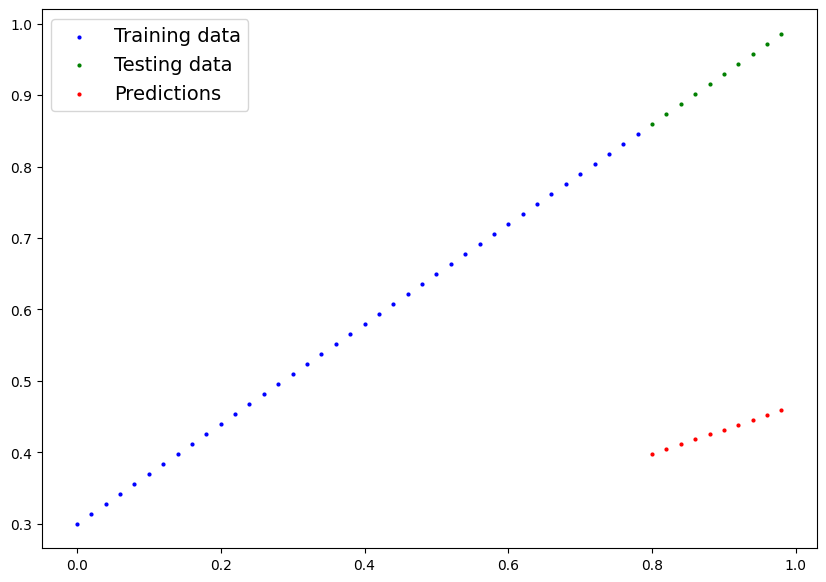

In [ ]:
plot_preds(predictions=y_preds)

## 3. Train model

In [ ]:
# Define the loss function
loss_fn = nn.L1Loss() # MAE = L1Loss

# Define the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
y_pred.shape, y_test.shape

(torch.Size([40, 1]), torch.Size([10, 1]))

In [ ]:
torch.manual_seed(42)

epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  ### TRAINING

  # Put model in training mode (this is the default state of a model)
  model_0.train()

  # 1. Forward pass on train data using the forward() method inside
  y_pred = model_0(X_train)

  # 2. Calculate the loss (how different our model's predictions are to the ground truth)
  loss = loss_fn(y_pred, y_train)

  # 3. Zero grad of the optimizer
  optimizer.zero_grad()

  # 4. Calculate the gradients of the loss wrt all the paremeters
  loss.backward()

  # 5. Make a small step, updating the weights a little bit in the direction of the steepest descent
  optimizer.step()


  ### TESTING
  if epoch % 10 == 0:

    # Put model in evaluation mode
    model_0.eval()

    # use torch.inference_mode() to turn of gradient tracking enabling us to do the forward pass faster
    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Calculate the loss on the test data
      test_loss = loss_fn(test_pred, y_test)

      # Print out what's happening
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")



Epoch: 0 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262
Epoch: 10 | MAE Train Loss: 0.021020207554101944 | MAE Test Loss: 0.04819049686193466
Epoch: 20 | MAE Train Loss: 0.01758546568453312 | MAE Test Loss: 0.04060482233762741
Epoch: 30 | MAE Train Loss: 0.014155393466353416 | MAE Test Loss: 0.03233227878808975
Epoch: 40 | MAE Train Loss: 0.010716589167714119 | MAE Test Loss: 0.024059748277068138
Epoch: 50 | MAE Train Loss: 0.0072835334576666355 | MAE Test Loss: 0.016474086791276932
Epoch: 60 | MAE Train Loss: 0.0038517764769494534 | MAE Test Loss: 0.008201557211577892
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 80 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 90 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882


* `.detach()`: creates a new tensor that shares the same data as `loss`, but doesn't require gradient
* `.numpy()` : converts the detached loss tensor into a NumPy array, which is easier for tasks like plotting, logging, or storing values for later analysis

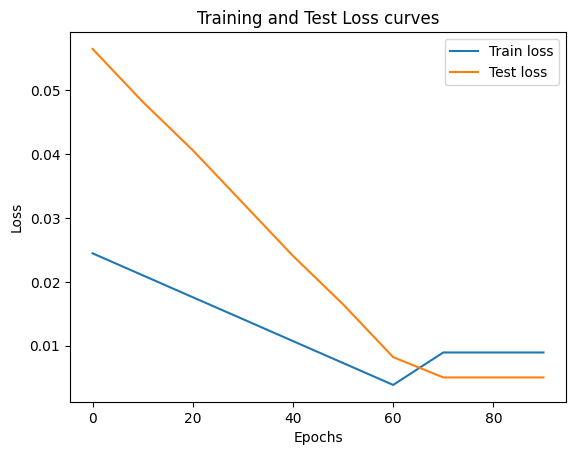

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and Test Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Check the new state dict
print(f"New learned parameters: {model_0.state_dict()}")

New learned parameters: OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


## 4. Making predictions with a trained PyTorch model (inference)


In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device,
  # in our case, we haven't setup device agnostic code yet so our data and model are on CPU by default
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)

y_preds-y_test


tensor([[0.0085],
        [0.0085],
        [0.0085],
        [0.0085],
        [0.0085],
        [0.0084],
        [0.0084],
        [0.0084],
        [0.0084],
        [0.0084]])

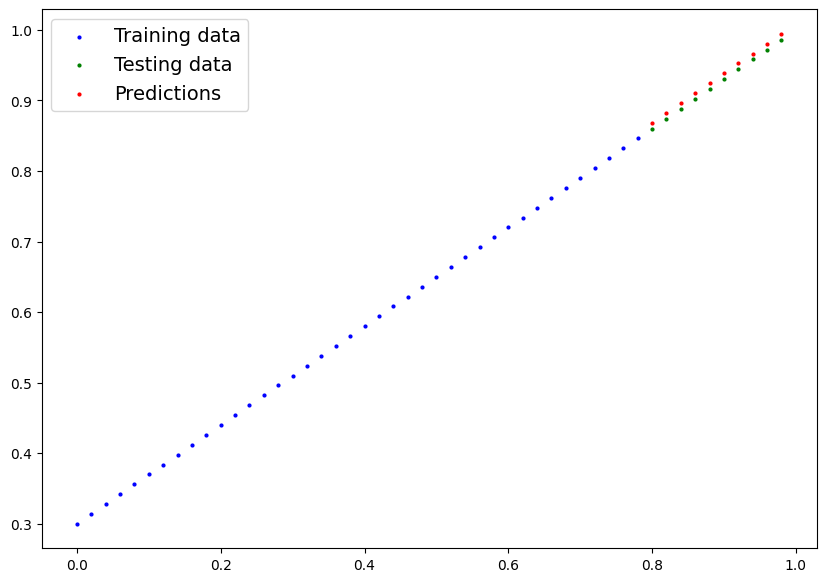

In [ ]:
plot_preds(predictions=y_preds)

## 5. Saving and loading a PyTorch model

In [ ]:
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model state dict()
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned paraemters
           f=MODEL_SAVE_PATH)
print(f"-")
print(f"---")
print(f"-----")
print(f"-------")
print(f"---------")
print(f"Saved the model! Yohoo....")

Saving model to: models/01_pytorch_workflow_model_0.pth
-
---
-----
-------
---------
Saved the model! Yohoo....


In [ ]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Jul 10 02:23 models/01_pytorch_workflow_model_0.pth


### Loading a saved PyTorch model's `state_dict()`

In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

Perform inference with our loaded model to check that things are working okay

In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

In [ ]:
# Import dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [ ]:
w = -0.3
b = 0.5

X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1)
y = w * X + b
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.5000],
         [0.4940],
         [0.4880],
         [0.4820],
         [0.4760],
         [0.4700],
         [0.4640],
         [0.4580],
         [0.4520],
         [0.4460]]))

In [ ]:
# Split data
s = int(0.8 * len(X))

X_train, y_train = X[:s], y[:s]
X_test, y_test = X[s:], y[s:]



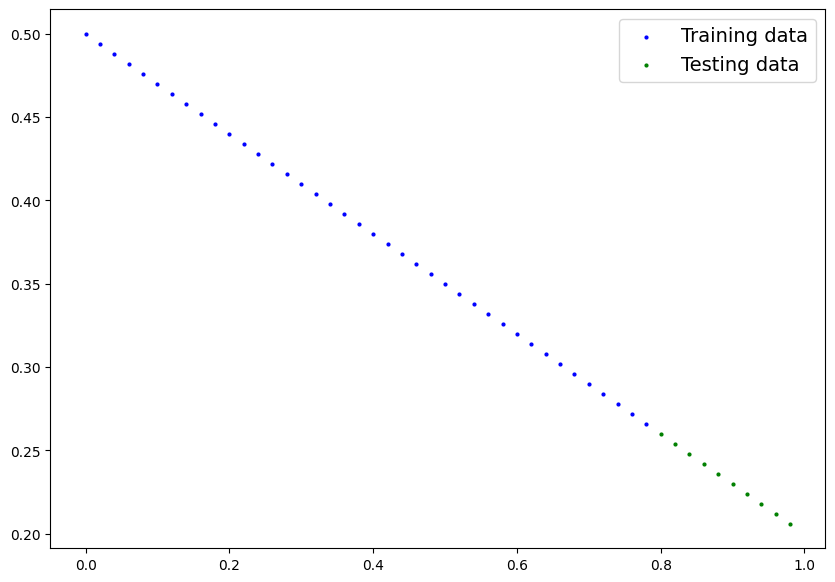

In [ ]:
plot_preds(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch linear model

In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use  `nn.Linear()` for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  # Define the forward computation (input data x flows through nn.Linear())
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed when creating the model (this will ensure that the results from this notebook are reproducible)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device)
next(model_1.parameters()).device


device(type='cpu')

### 6.3 Training

In [ ]:
# Pick loss function
loss_fn = nn.L1Loss()

# Pick the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/ data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ###  TRAINING
  model_1.train()

  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### TESTING
  if epoch % 100 == 0:
    model_1.eval()
    with torch.inference_mode():
      test_pred = model_1(X_test)
      test_loss = loss_fn(test_pred, y_test)

    print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Train Loss: 0.7451778650283813 | Test Loss: 1.2639763355255127
Epoch: 100 | Train Loss: 0.14618417620658875 | Test Loss: 0.3784943222999573
Epoch: 200 | Train Loss: 0.10941097885370255 | Test Loss: 0.25489383935928345
Epoch: 300 | Train Loss: 0.07506971061229706 | Test Loss: 0.17491653561592102
Epoch: 400 | Train Loss: 0.04072467237710953 | Test Loss: 0.09425231069326401
Epoch: 500 | Train Loss: 0.006384828127920628 | Test Loss: 0.014274954795837402
Epoch: 600 | Train Loss: 0.0075493911281228065 | Test Loss: 0.0013772889506071806
Epoch: 700 | Train Loss: 0.0075493911281228065 | Test Loss: 0.0013772889506071806
Epoch: 800 | Train Loss: 0.0075493911281228065 | Test Loss: 0.0013772889506071806
Epoch: 900 | Train Loss: 0.0075493911281228065 | Test Loss: 0.0013772889506071806


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.2909]])),
             ('linear_layer.bias', tensor([0.5040]))])

In [ ]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds - y_test

tensor([[0.0113],
        [0.0115],
        [0.0116],
        [0.0118],
        [0.0120],
        [0.0122],
        [0.0124],
        [0.0125],
        [0.0127],
        [0.0129]])

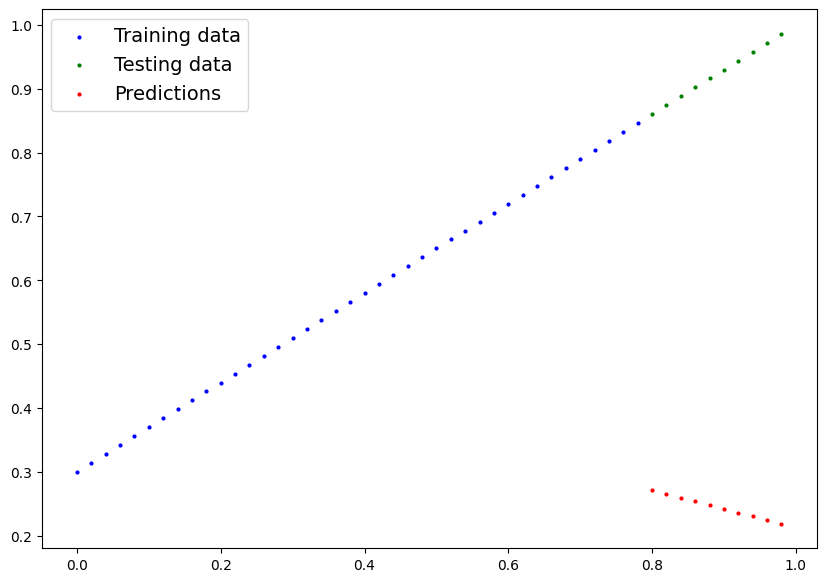

In [ ]:
plot_preds(predictions=y_preds)